In [ ]:
!pip install googletrans==3.1.0a0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("lang.csv")

In [ ]:
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (878, 7)


In [ ]:
df.head()

,Unnamed: 0,id,person_name,nine_box_category,feedback,adjusted,reviewed
0,47,53,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन देने में विफल रहे। वह लगातार काफी ...,False,False
1,46,52,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन ने हमारी कंपनी में धीमी शुरुआत की ...,False,False
2,45,50,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन के लिए इस तिमाही में कठिन समय रहा है। बी...,False,False
3,44,49,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Addison is consistently sloppy in her work. I ...,False,False
4,126,51,Addison Cohen,Category 2: 'Average performer' (Moderate perf...,एडिसन का मतलब अच्छा है लेकिन वह प्रयास नहीं कर...,True,True


In [ ]:
df= df.drop(['adjusted','reviewed'],axis=1)

In [ ]:
df.head()

,Unnamed: 0,id,person_name,nine_box_category,feedback
0,47,53,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन देने में विफल रहे। वह लगातार काफी ...
1,46,52,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन ने हमारी कंपनी में धीमी शुरुआत की ...
2,45,50,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन के लिए इस तिमाही में कठिन समय रहा है। बी...
3,44,49,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Addison is consistently sloppy in her work. I ...
4,126,51,Addison Cohen,Category 2: 'Average performer' (Moderate perf...,एडिसन का मतलब अच्छा है लेकिन वह प्रयास नहीं कर...


In [ ]:
freq = df.groupby('nine_box_category').size()
freq

nine_box_category
Category 1: 'Risk' (Low performance, Low potential)                        126
Category 2: 'Average performer' (Moderate performance, Low potential)      106
Category 3: 'Solid Performer' (High performance, Low potential)             89
Category 4: 'Inconsistent Player' (Low performance, Moderate potential)    113
Category 5: 'Core Player' (Moderate performance, Moderate potential)       112
Category 6: 'High Performer' (High performance, Moderate potential)         91
Category 7: 'Potential Gem' (Low performance, High potential)               41
Category 8: 'High Potential' (Moderate performance, High potential)         88
Category 9: 'Star' (High performance, High potential)                      112
dtype: int64

In [ ]:
import numpy as np

conditions = [
    (df['nine_box_category'] == "Category 1: 'Risk' (Low performance, Low potential)"),
    (df['nine_box_category'] == "Category 2: 'Average performer' (Moderate performance, Low potential)") | (df['nine_box_category'] == "Category 4: 'Inconsistent Player' (Low performance, Moderate potential)") | (df['nine_box_category'] == "Category 3: 'Solid Performer' (High performance, Low potential)") | (df['nine_box_category'] == "Category 6: 'High Performer' (High performance, Moderate potential)") | (df['nine_box_category'] == "Category 8: 'High Potential' (Moderate performance, High potential)") | (df['nine_box_category'] == "Category 9: 'Star' (High performance, High potential)") | (df['nine_box_category'] == "Category 7: 'Potential Gem' (Low performance, High potential)") | (df['nine_box_category'] == "Category 5: 'Core Player' (Moderate performance, Moderate potential)")
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['category'] = np.select(conditions, values)

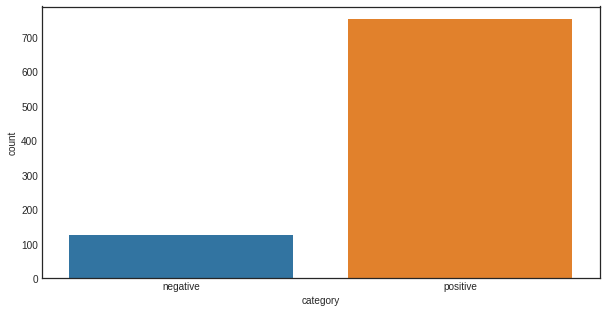

In [ ]:
sns.countplot(df.category)

In [ ]:
df.head()

,Unnamed: 0,id,person_name,nine_box_category,feedback,category
0,47,53,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन देने में विफल रहे। वह लगातार काफी ...,negative
1,46,52,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन कोहेन ने हमारी कंपनी में धीमी शुरुआत की ...,negative
2,45,50,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",एडिसन के लिए इस तिमाही में कठिन समय रहा है। बी...,negative
3,44,49,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Addison is consistently sloppy in her work. I ...,negative
4,126,51,Addison Cohen,Category 2: 'Average performer' (Moderate perf...,एडिसन का मतलब अच्छा है लेकिन वह प्रयास नहीं कर...,positive


In [ ]:
translator = Translator()
for ind in df.index:
    review = df['feedback'][ind]
    df['feedback'][ind] = translator.translate(review).text
df

,Unnamed: 0,id,person_name,nine_box_category,feedback,category
0,47,53,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Addison Cohen failed to deliver. He consistent...,negative
1,46,52,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...","Edison Cohen has a slow start in our company, ...",negative
2,45,50,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Edison has had a tough time this quarter. Bein...,negative
3,44,49,Addison Cohen,"Category 1: 'Risk' (Low performance, Low poten...",Addison is consistently sloppy in her work. I ...,negative
4,126,51,Addison Cohen,Category 2: 'Average performer' (Moderate perf...,Edison means well but doesn't put in the effor...,positive
...,...,...,...,...,...,...
873,689,569,Yahir Harvey,Category 8: 'High Potential' (Moderate perform...,Yahir Harvey can be a creative person with man...,positive
874,691,574,Yahir Harvey,Category 8: 'High Potential' (Moderate perform...,Mr Harvey was achieving what he was assigned f...,positive
875,397,525,Zachary Doyle,Category 4: 'Inconsistent Player' (Low perform...,Zachary has had a tough time learning the rope...,positive
876,431,523,Zachary Doyle,Category 4: 'Inconsistent Player' (Low perform...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positive


In [ ]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [ ]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
corpus = text_transformation(df['feedback'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


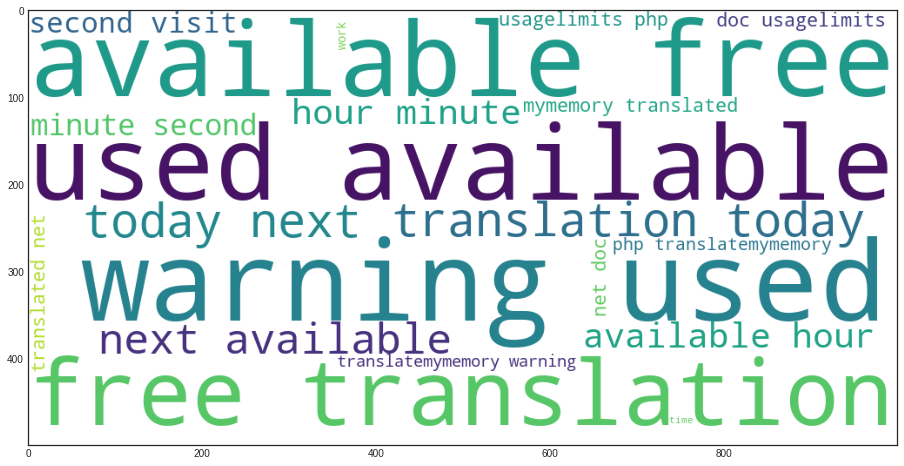

In [ ]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
persons = df.sort_values(by = 'person_name').drop(['id', 'nine_box_category','category'], axis=1)
persons.reset_index(inplace = True, drop = True)
persons['sentiment']='True'
persons

,Unnamed: 0,person_name,feedback,sentiment
0,47,Addison Cohen,Addison Cohen failed to deliver. He consistent...,True
1,46,Addison Cohen,"Edison Cohen has a slow start in our company, ...",True
2,45,Addison Cohen,Edison has had a tough time this quarter. Bein...,True
3,44,Addison Cohen,Addison is consistently sloppy in her work. I ...,True
4,126,Addison Cohen,Edison means well but doesn't put in the effor...,True
...,...,...,...,...
873,688,Yahir Harvey,Yahir Harvey is a hard worker and improves his...,True
874,691,Yahir Harvey,Mr Harvey was achieving what he was assigned f...,True
875,431,Zachary Doyle,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,True
876,397,Zachary Doyle,Zachary has had a tough time learning the rope...,True


In [ ]:
person_li=list(persons.person_name.unique())
person_li

['Addison Cohen',
 'Alecia Keys',
 'Alex Watts',
 'Alfie Wright',
 'Alina Britt',
 'Allan Logan',
 'Alonso Gibson',
 'Amaya Gay',
 'Amelie Martin',
 'Amy John',
 'Andrea Thomas',
 'Andy Kennedy',
 'Angelica Peterson',
 'Aniya Sullivan',
 'April Craft',
 'Archie Dawson',
 'Aryanna Carney',
 'Ava West',
 'Azariah Mcmillan',
 'Bailey Hunt',
 'Bailey Hunter',
 'Benjamin Roberts',
 'Bethany Cunningham',
 'Blake Rodriquez',
 'Bobby Lowe',
 'Braiden Santos',
 'Brantley Whitfield',
 'Braydon Terrell',
 'Briley Mcknight',
 'Broderick Hays',
 'Bruno Johns',
 'Bryleigh Stafford',
 'Brynlee Byers',
 'Caiden Pace',
 'Camille Hahn',
 'Carl Thorn',
 'Cason Vargas',
 'Caylee Donovan',
 'Celine Clayton',
 'Chanel Cleveland',
 'Chelsea Ross',
 'Chelsea Stevens',
 'Clay Terry',
 'Conner Mcintyre',
 'Cristian Fleming',
 'Dallas Whitehead',
 'Daniel Carr',
 'Daniel Hill',
 'Darius Stafford',
 'David Kelly',
 'Dean Phillips',
 'Declan Houghton',
 'Deegan Dennis',
 'Dennis Buchanan',
 'Deon Griffith',
 'Doug

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment=[]
for person in person_li:
    negative,neutral,good,comp=0.0,0.0,0.0,0.0
    print(person)
    for ind in persons.index:
        if person == persons['person_name'][ind]:
            vs = analyzer.polarity_scores(persons['feedback'][ind])
            negative+=vs['neg']
            neutral+=vs['neu']
            good+=vs['pos']
            if vs['neg'] > vs['pos']:
                persons['sentiment'][ind]='negative'
            else:
                persons['sentiment'][ind]='positive'
            # print(persons['feedback'][ind]," --> ",str(vs))
    if neutral > good and neutral > negative:
        if negative > good:
            print("Sentiment = negative :",negative)
            sentiment.append("negative") 
        else:
            print("Sentiment = good :",good)
            sentiment.append("positive")
    elif negative > good:
        print("Sentiment = negative :",negative)
        sentiment.append("negative") 
    else:
        print("Sentiment = good :",good)
        sentiment.append("positive")
person_dic={
    'person_name': person_li,
    'sentiment': sentiment
}
person_df=pd.DataFrame(person_dic)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Addison Cohen
Sentiment = negative : 0.524
Alecia Keys
Sentiment = good : 0.877
Alex Watts
Sentiment = good : 1.3320000000000003
Alfie Wright
Sentiment = good : 1.104
Alina Britt
Sentiment = good : 2.1189999999999993
Allan Logan
Sentiment = good : 0.601
Alonso Gibson
Sentiment = good : 1.266
Amaya Gay
Sentiment = good : 1.15
Amelie Martin
Sentiment = good : 0.6900000000000001
Amy John
Sentiment = good : 1.4629999999999996
Andrea Thomas
Sentiment = good : 0.6900000000000001
Andy Kennedy
Sentiment = good : 0.41400000000000003
Angelica Peterson
Sentiment = good : 1.197
Aniya Sullivan
Sentiment = good : 0.7130000000000001
April Craft
Sentiment = good : 0.552
Archie Dawson
Sentiment = good : 0.552
Aryanna Carney
Sentiment = good : 0.49200000000000005
Ava West
Sentiment = good : 0.49
Azariah Mcmillan
Sentiment = good : 0.328
Bailey Hunt
Sentiment = good : 0.99
Bailey Hunter
Sentiment = good : 1

In [ ]:
person_df

,person_name,sentiment
0,Addison Cohen,negative
1,Alecia Keys,positive
2,Alex Watts,positive
3,Alfie Wright,positive
4,Alina Britt,positive
...,...,...
159,Tom Houghton,positive
160,Tom Williams,positive
161,Wade Stanley,positive
162,Yahir Harvey,positive


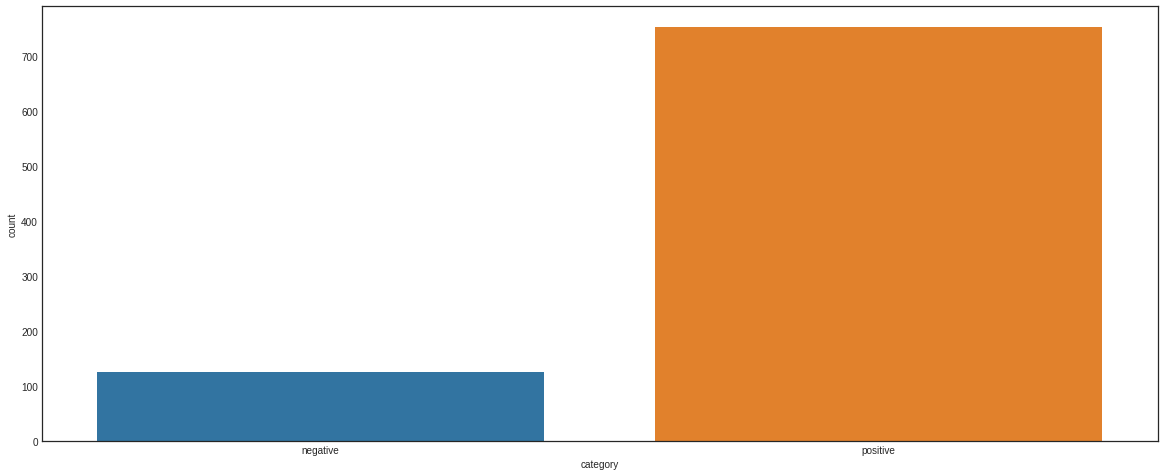

In [ ]:
sns.countplot(df.category)

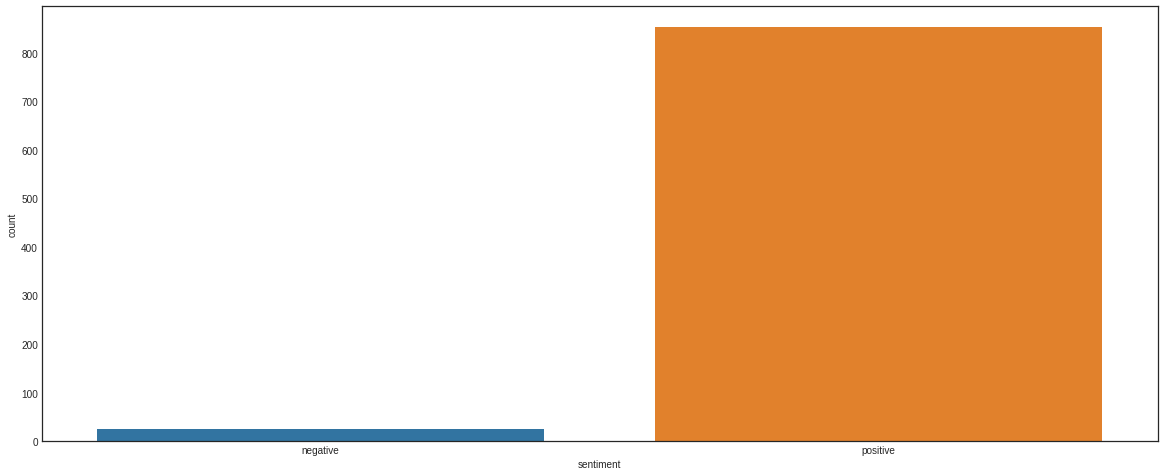

In [ ]:
sns.countplot(persons.sentiment)

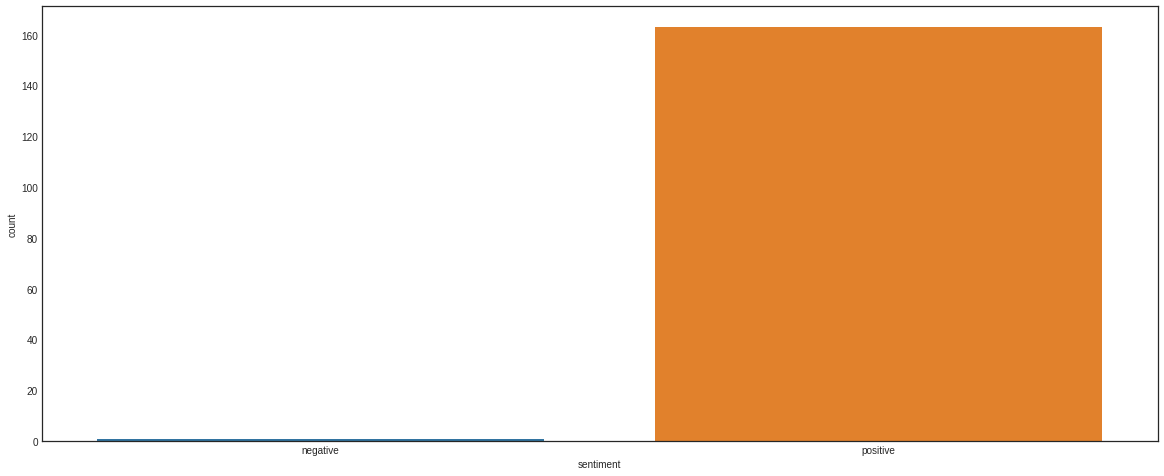

In [ ]:
sns.countplot(person_df.sentiment)

In [ ]:
print("Classified Count\n",df.groupby('category').size())
print("Sentiment Count\n",persons.groupby('sentiment').size())
print("Aggregated Sentiment Count\n",person_df.groupby('sentiment').size())
score=accuracy_score(df['category'],persons['sentiment'])
print("Accuracy = ",round(score*100,2))

Classified Count
 category
negative    126
positive    752
dtype: int64
Sentiment Count
 sentiment
negative     25
positive    853
dtype: int64
Aggregated Sentiment Count
 sentiment
negative      1
positive    163
dtype: int64
Accuracy =  85.08
